In [1]:
# Name: Homework #2 -- ECGR 4105
# Purpose: Logistic Regression
# Author: Tim Johnson, Electrical Engineering Major, UNCC
# Date Created: October 20, 2021

In [2]:
# Import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns

# Read the csv file that has the dataset
diabetes = pd.read_csv('diabetes.csv');
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Split dataset into independent and dependent variables
x = diabetes.iloc[:, [0,1,2,3,4,5,6,7]].values
y = diabetes.iloc[:, 8].values

In [4]:
######################################################################################################
# PROBLEM 1

In [5]:
# Split dataset into training and test sets
from sklearn.model_selection import train_test_split
np.random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 5)

In [6]:
# Feature scale and standardize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [7]:
# Logistic regression on training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0);
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

# Output first 9 predictions
y_pred[0:9]

array([0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [8]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[88, 12],
       [19, 35]], dtype=int64)

In [9]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7987012987012987
Precision: 0.7446808510638298
Recall: 0.6481481481481481


Text(0.5, 257.44, 'Predicted label')

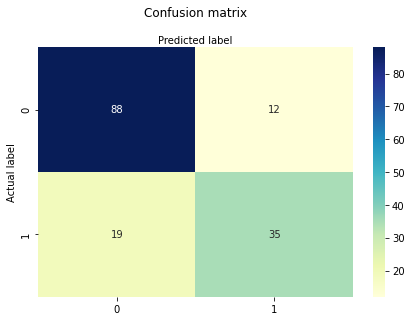

In [10]:
import seaborn as sns
class_names = [0,1] # name of classes
fig, ax = plot.subplots()
tick_marks = np.arange(len(class_names))
plot.xticks(tick_marks, class_names)
plot.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plot.tight_layout()
plot.title('Confusion matrix', y=1.1)
plot.ylabel('Actual label')
plot.xlabel('Predicted label')

In [11]:
######################################################################################################
# PROBLEM 2

In [12]:
# Split dataset into training and test sets
np.random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 4)

In [13]:
# Feature scale data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [14]:
# Naive Bayes Classification
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

# Output first 9 predictions
y_pred[0:9]

array([0, 0, 0, 0, 0, 1, 1, 1, 1], dtype=int64)

In [15]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[83, 19],
       [18, 34]], dtype=int64)

In [16]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7597402597402597
Precision: 0.6415094339622641
Recall: 0.6538461538461539


Text(0.5, 257.44, 'Predicted label')

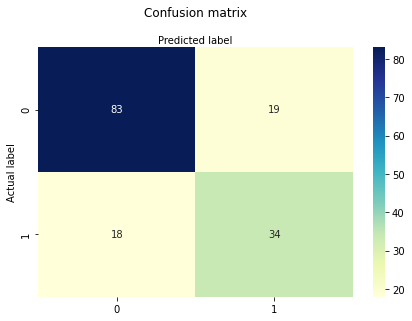

In [17]:
class_names = [0,1] # name of classes
fig, ax = plot.subplots()
tick_marks = np.arange(len(class_names))
plot.xticks(tick_marks, class_names)
plot.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plot.tight_layout()
plot.title('Confusion matrix', y=1.1)
plot.ylabel('Actual label')
plot.xlabel('Predicted label')

In [18]:
######################################################################################################
# PROBLEM 3

In [19]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score

# Feature scale data
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Logistic regression on data
classifier = LogisticRegression();

In [20]:
# Define the number of K folds to be 5
cv_5 = KFold(n_splits = 5, shuffle = True, random_state = 1)

scoring_a = make_scorer(accuracy_score)
scoring_p = make_scorer(precision_score)
scoring_r = make_scorer(recall_score)

In [21]:
# Evaluate the dataset through cross validation for accuracy, precision, recall
score_a = cross_val_score(classifier, x, y, scoring=scoring_a, cv=cv_5, n_jobs=-1)
score_p = cross_val_score(classifier, x, y, scoring=scoring_p, cv=cv_5, n_jobs=-1)
score_r = cross_val_score(classifier, x, y, scoring=scoring_r, cv=cv_5, n_jobs=-1)

In [22]:
print('Results of Kfold cross validation for k = 5')
print('Accuracy: ', mean(score_a))
print('Precision: ', mean(score_p))
print('Recall: ', mean(score_r))

Results of Kfold cross validation for k = 5
Accuracy:  0.7695187165775401
Precision:  0.7159381269137366
Recall:  0.5643909444852842


In [23]:
# Define the number of K folds to be 10
cv_10 = KFold(n_splits = 10, shuffle = True, random_state = 2)

scoring_a = make_scorer(accuracy_score)
scoring_p = make_scorer(precision_score)
scoring_r = make_scorer(recall_score)

In [24]:
# Evaluate the dataset through cross validation for accuracy, precision, recall
score_a = cross_val_score(classifier, x, y, scoring=scoring_a, cv=cv_10, n_jobs=-1)
score_p = cross_val_score(classifier, x, y, scoring=scoring_p, cv=cv_10, n_jobs=-1)
score_r = cross_val_score(classifier, x, y, scoring=scoring_r, cv=cv_10, n_jobs=-1)

In [25]:
print('Results of Kfold cross validation for k = 10')
print('Accuracy: ', mean(score_a))
print('Precision: ', mean(score_p))
print('Recall: ', mean(score_r))

Results of Kfold cross validation for k = 10
Accuracy:  0.774794941900205
Precision:  0.7225267105129806
Recall:  0.5712219724486863


In [26]:
######################################################################################################
# PROBLEM 4

In [27]:
# Feature scale data
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Guassian Bayes classification
classifier = GaussianNB()

In [28]:
# Define the number of K folds to be 5
cv_5 = KFold(n_splits = 5, shuffle = True, random_state = 3)

scoring_a = make_scorer(accuracy_score)
scoring_p = make_scorer(precision_score)
scoring_r = make_scorer(recall_score)

In [29]:
# Evaluate the dataset through cross validation for accuracy, precision, recall
score_a = cross_val_score(classifier, x, y, scoring=scoring_a, cv=cv_5, n_jobs=-1)
score_p = cross_val_score(classifier, x, y, scoring=scoring_p, cv=cv_5, n_jobs=-1)
score_r = cross_val_score(classifier, x, y, scoring=scoring_r, cv=cv_5, n_jobs=-1)

In [30]:
print('Results of Kfold cross validation for k = 5')
print('Accuracy: ', mean(score_a))
print('Precision: ', mean(score_p))
print('Recall: ', mean(score_r))

Results of Kfold cross validation for k = 5
Accuracy:  0.7526355996944232
Precision:  0.6681052323464701
Recall:  0.5948886228978395


In [31]:
# Define the number of K folds to be 10
cv_10 = KFold(n_splits = 10, shuffle = True, random_state = 2)

scoring_a = make_scorer(accuracy_score)
scoring_p = make_scorer(precision_score)
scoring_r = make_scorer(recall_score)

In [32]:
# Evaluate the dataset through cross validation for accuracy, precision, recall
score_a = cross_val_score(classifier, x, y, scoring=scoring_a, cv=cv_10, n_jobs=-1)
score_p = cross_val_score(classifier, x, y, scoring=scoring_p, cv=cv_10, n_jobs=-1)
score_r = cross_val_score(classifier, x, y, scoring=scoring_r, cv=cv_10, n_jobs=-1)

In [33]:
print('Results of Kfold cross validation for k = 10')
print('Accuracy: ', mean(score_a))
print('Precision: ', mean(score_p))
print('Recall: ', mean(score_r))

Results of Kfold cross validation for k = 10
Accuracy:  0.7618762816131238
Precision:  0.675342646858389
Recall:  0.6068432601425986
